In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [25]:
def convert(char):
    return format(ord(char), '09b')

In [41]:
quantization_table = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]



# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

# Referred from Matlab 2-D DCT page
# https://in.mathworks.com/help/images/ref/dct2.html

def dct(image):
    image_data = image.astype(float)
    m, n = image_data.shape
    image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_division)
    print (y_division)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0.1
    lis_selected = []
    
    T = 0.2
    TL = 0
    TH = 0
    
    pointer = 0
    
    avg = 0
    
    eof = 0
    
#     with open("Data.txt") as f:
#         while True:
#             c = f.read(1)
#             if not c:
#                 print ("End of file")
#                 break
#             print ("Read a character:", c)
#             print (' '.join(format(ord(x), 'b') for x in c))
    
    f = open("Data.txt","r")
    string = f.read()
#     print (string)
    
    data = ''
    for i in string:
        data += convert(i)
#     print (string)
#     print (data)
    

    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            image_dct[x_s:x_e, y_s:y_e] = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            y = 0
            sum_coeff = 0
            avg = 0
            
            if eof == 0:
            
                for l in lis_dct:
                    for k in l:
                        if y == 0:
                            y += 1
                            continue
                        else:
                            y += 1
                            sum_coeff += (k * k)
                            avg += k
    #             print ('sum_coeff = ', sum_coeff)
                F = sum_coeff/64
                avg /= 64
                # Indexes of selected blocks inserted in a list, useful while traversing later
                if F < TF:
                    lis_selected.append((i, j))

                    """ Embedding Code Start """
                    for l in lis_dct:
                        for k in l:
    #                         x = k
                            if T >= 0:
            #                     print ("IN1")
            #                     print (abs(x - T))
                                if abs(k - T) <= 0.1:
                                    current = 0
                                    print ("IN2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break
#                                         return image_dct
    

                                    c = data[pointer]
                                    pointer += 1
                                    print ("Read a character:", c)
                                    print ("Old K: ", k)
                                    k += int(c)
                                    print ("New K: ", k)

    #                                 with open("Data.txt") as f:
    #                                     while True:
    #                                         c = f.read(1)
    #                                         if not c:
    #                                             print ("End of file")
    #         #                                     break
    #                                             return image_dct
    #                                         if current < pointer:
    #                                             current += 1
    #                                             contnue
    #                                         elif current >= pointer:
    #                                             print ("Read a character:", c)
    #         #                                     print (' '.join(format(ord(x), 'b') for x in c))
    #                                             current += 1
    #                                             pointer = current
    #                                             print ("Old K: ", k)
    #                                             k += int(c)
    #                                             print ("New K: ", k)
    #                                             break



                                elif (k - T) > 0.1:
                                    k += 1
    #                                 print (k)

                            else:
                                print ("OUT1")
                                if abs(k - T) <= 0.1:
                                    current = 0
                                    print ("OUT2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break
#                                         return image_dct


                                    c = data[pointer]
                                    print ("Read a character:", c)
                                    pointer += 1
                                    print ("Old K: ", k)
                                    k -= int(c)
                                    print ("New K: ", k)

    #                                 with open("Data.txt") as f:
    #                                     while True:
    #                                         c = f.read(1)
    #                                         if not c:
    #                                             print ("End of file")
    #         #                                     break
    #                                             return image_dct
    #                                         if current < pointer:
    #                                             current += 1
    #                                             continue
    #                                         elif current >= pointer:
    #                                             print ("Read a character:", c)
    #         #                                     print (' '.join(format(ord(x), 'b') for x in c))
    #                                             current += 1
    #                                             pointer = current
    #                                             k -= int(c)
    #                                             break

                                elif (k - T) < 0.1:
                                    k -= 1
                    """ Embedding Code Finish """


                lis_F.append(F)
    #             if x < 5:
    #                 print (F)
    #                 print (lis_dct)
    #                 print (avg)
    #                 x += 1
    #                 print ('y = ', y)

#     print ("Avg is ", sum(lis_F) / len(lis_F))
#     print (lis_F)
    print (data)
    print ("Length of lis_F = ", len(lis_F))
    print ("Length of lis_selected = ", len(lis_selected))
#     print (lis_selected)
    return image_dct




m =  2100
n =  1179
262
147
IN2
Read a character: 0
Old K:  0.248744231037
New K:  0.248744231037
IN2
Read a character: 0
Old K:  0.283798422313
New K:  0.283798422313
IN2
Read a character: 1
Old K:  0.117749352183
New K:  1.11774935218
IN2
Read a character: 0
Old K:  0.107480512251
New K:  0.107480512251
IN2
Read a character: 0
Old K:  0.297544895333
New K:  0.297544895333
IN2
Read a character: 1
Old K:  0.218520021472
New K:  1.21852002147
IN2
Read a character: 0
Old K:  0.157714072858
New K:  0.157714072858
IN2
Read a character: 0
Old K:  0.227129392761
New K:  0.227129392761
IN2
Read a character: 0
Old K:  0.137525377455
New K:  0.137525377455
IN2
Read a character: 0
Old K:  0.290806546443
New K:  0.290806546443
IN2
Read a character: 0
Old K:  0.285292971028
New K:  0.285292971028
IN2
Read a character: 0
Old K:  0.114583333333
New K:  0.114583333333
IN2
Read a character: 0
Old K:  0.13069222933
New K:  0.13069222933
IN2
Read a character: 0
Old K:  0.117294182717
New K:  0.117294182

New K:  1.12434323115
IN2
Read a character: 0
Old K:  0.298133744322
New K:  0.298133744322
IN2
Read a character: 0
Old K:  0.238998795308
New K:  0.238998795308
IN2
Read a character: 1
Old K:  0.25414304771
New K:  1.25414304771
IN2
Read a character: 1
Old K:  0.102753329261
New K:  1.10275332926
IN2
Read a character: 1
Old K:  0.221237406986
New K:  1.22123740699
IN2
Read a character: 1
Old K:  0.199676791942
New K:  1.19967679194
IN2
Read a character: 0
Old K:  0.125462390478
New K:  0.125462390478
IN2
Read a character: 0
Old K:  0.10612806753
New K:  0.10612806753
IN2
Read a character: 1
Old K:  0.251990272594
New K:  1.25199027259
IN2
Read a character: 0
Old K:  0.104166666667
New K:  0.104166666667
IN2
Read a character: 0
Old K:  0.241546237747
New K:  0.241546237747
IN2
Read a character: 0
Old K:  0.12757476127
New K:  0.12757476127
IN2
Read a character: 1
Old K:  0.12241982858
New K:  1.12241982858
IN2
Read a character: 0
Old K:  0.273851063306
New K:  0.273851063306
IN2
Read a

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

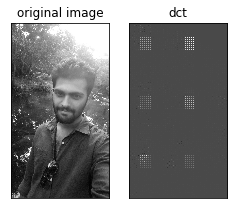

In [42]:
image = cv2.imread('github.jpeg', 0)

# DCT
image_dct = dct(image)

plt.subplot(131)
plt.imshow(image, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(image_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])

In [40]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php

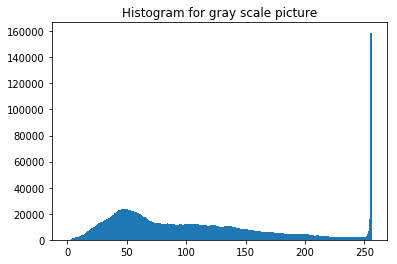

In [5]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(image,256,[0,256])
a = plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [6]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

256


In [7]:
format(14, '#010b')

'0b00001110'

In [8]:
format(256, '#010b')

'0b100000000'

In [9]:
format(256, '09b')

'100000000'

In [10]:
format(97, '09b')

'001100001'

In [21]:
f = open("Data.txt","r")
string = f.read()
print (string)

97


In [22]:
data = ''
for i in string:
    data += convert(i)
print (string)
print (data)

97
000111001000110111
